<a href="https://colab.research.google.com/github/dokdin/Portfolio3/blob/master/%EC%8B%9C%EC%8A%A4%ED%85%9C_%ED%92%88%EC%A7%88_%EB%B3%80%ED%99%94%EB%A1%9C_%EC%9D%B8%ED%95%9C_%EC%82%AC%EC%9A%A9%EC%9E%90_%EB%B6%88%ED%8E%B8_%EC%98%88%EC%A7%80_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요 라이브러리 호출 
import pandas as pd
import numpy as np
import os
import datetime as dt
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings(action='ignore')

# 필요 함수 정의

def make_datetime(x):
    # string 타입의 Time column을 datetime 타입으로 변경
    x     = str(x)
    year  = int(x[:4])
    month = int(x[4:6])
    day   = int(x[6:8])
    # hour  = int(x[8:10])
    #mim  = int(x[10:12])
    #sec  = int(x[12:])
    return dt.datetime(year,month, day)

# 결측치 함수생성
def missing(x):
    %matplotlib inline
    msno.matrix(x,figsize=(9,3))

def missing_table(table):
  table_miss=pd.DataFrame(table.isnull().sum(), columns = ['결측치 개수'])
  display(table_miss)

In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# 파일 디렉토리 
PATH='/content/drive/MyDrive/Data/LG/'
CSV_PATH='/content/drive/MyDrive/Data/LG/CSV/'
IMAGE_PATH='/content/drive/MyDrive/Data/LG/IMAGE/'


# 파일 출력
file_list=os.listdir(PATH)
print("file_list:{}".format(file_list))

Mounted at /content/drive
file_list:['train_err_data.csv', 'train_quality_data.csv', 'train_problem_data.csv', 'test_err_data.csv', 'test_quality_data.csv', '.ipynb_checkpoints', 'sample_submission.csv', 'CSV', 'test_numberofmodel.csv', 'test_numberofupdate.csv', 'train_numberofmodel.csv', 'IMAGE']


In [ ]:
# 파일 불러오기 
train_err = pd.read_csv(PATH+"train_err_data.csv")
test_err = pd.read_csv(PATH+'test_err_data.csv')
train_quality = pd.read_csv(PATH+'train_quality_data.csv')
test_quality= pd.read_csv(PATH+'test_quality_data.csv')
train_prob = pd.read_csv(PATH+'train_problem_data.csv')

In [ ]:
# datetime 변환 
train_err['datetime']=train_err['time'].apply(make_datetime)
train_prob['datetime']=train_prob['time'].apply(make_datetime)

# 문제제기(Prob_data)d 사용자 EDA

In [ ]:
# train_prob 결측치 확인
pd.DataFrame(train_prob.isnull().sum(), columns = ['결측치 개수'])

,결측치 개수
user_id,0
time,0
datetime,0


In [ ]:
# 오류발생 사용자와 문제제기 사용자(회원번호) 추출
train_err_user_set = set(train_err['user_id'])
train_proplem_user_set  = set(train_prob['user_id'])

In [ ]:
common_errtype = train_err_user_set.intersection(train_proplem_user_set)
print(f"오류발생/불만제기에 공통으로 포함되어 있는 User_id 개수 : {len(common_errtype)}")

오류발생/불만제기에 공통으로 포함되어 있는 User_id 개수 : 5000


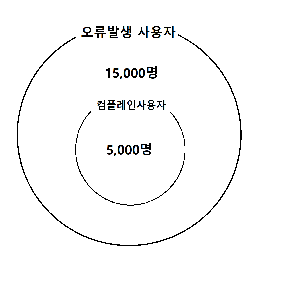

In [ ]:
# 오류발생 사용자 ∩ 불만제기 사용자 
from PIL import Image 
Image=Image.open(IMAGE_PATH+"image0.png")
display(Image.resize((int(Image.size[0]/4),int(Image.size[1]/4)),0))

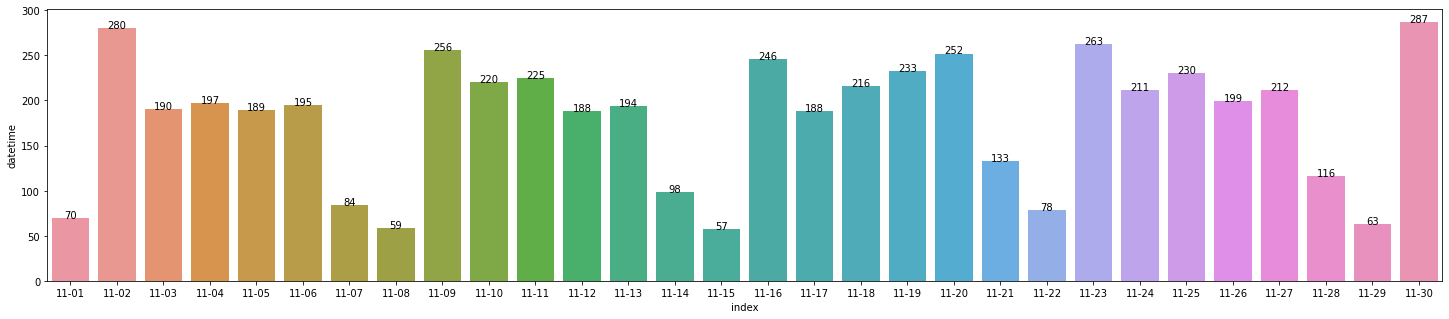

In [ ]:
fig,axes = plt.subplots(figsize=(25,5))
plot_data=pd.DataFrame(train_prob['datetime'].value_counts().sort_index().reset_index())

# datetime에서 str로 변환
plot_data['index'] = plot_data['index'].dt.strftime('%Y-%m-%d')
# 시각화시 문자가 길어 겹치므로 문자열 치환 
plot_data['index'] = plot_data['index'].str.replace('2020-','')

# 시각화 
graph=sns.barplot(x = 'index', y = 'datetime', data = plot_data)

# 수치화 
for index, row in plot_data.iterrows():
  graph.text(row.name,row.datetime, round(row.datetime,2), color='black', ha="center")

In [ ]:
#  컴플레인 사용자 데이터 로그에러 
prob_user_id=train_prob.user_id.unique().tolist()
prob_err=train_err[train_err.user_id.isin(prob_user_id)]

In [ ]:
# 중복제거 
prob_err_rm=prob_err[['user_id','model_nm']].drop_duplicates(subset=['user_id','model_nm'],keep='last')

In [ ]:
prob_err_rm2=prob_err_rm['model_nm'].value_counts().to_frame().reset_index()

In [ ]:
prob_err_rm2.columns=['model_name','model_nm']

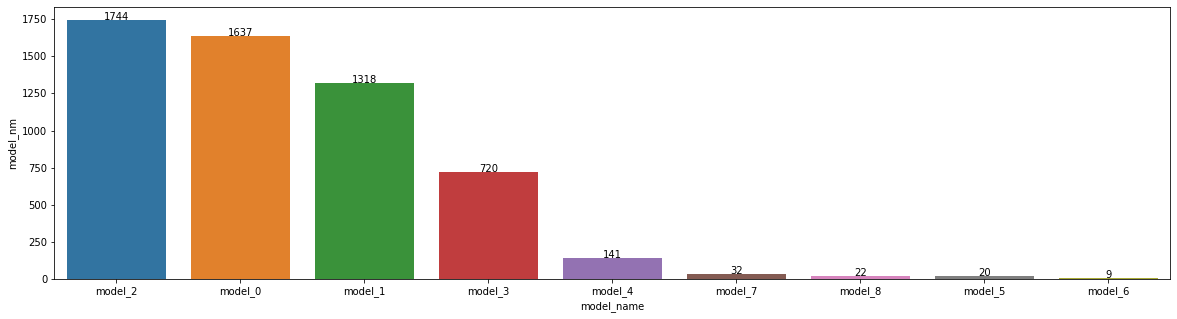

In [ ]:
# 컴플레인 사용자 모델 수 
fig,axes=plt.subplots(ncols=1,figsize=(20,5))
graph=sns.barplot(x='model_name',y='model_nm',data=prob_err_rm2)
for index, row in prob_err_rm2.iterrows():
    graph.text(row.name,row.model_nm, round(row.model_nm,2), color='black', ha="center")

# 오류데이터(Train_err) EDA


In [ ]:
# 'train_err_data' 불러오기
train_err = pd.read_csv(PATH+'train_err_data.csv')

# 'train_err_data'의 일부분 살펴보기
print('train_err_data 차원 확인하기 :', train_err.shape, '\n')
print('-' * 50, '\n')

print(train_err.info())
print('-' * 50)
display(train_err.head(3))

train_err_data 차원 확인하기 : (16554663, 6) 

-------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB
None
--------------------------------------------------


,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1


In [ ]:
# Train 결측치 확인
pd.DataFrame(train_err.isnull().sum(), columns = ['결측치 개수'])

,결측치 개수
user_id,0
time,0
model_nm,0
fwver,0
errtype,0
errcode,1


In [ ]:
# Train의 사용자 수 파악
print('오류발생 사용자 수 :', len(train_err['user_id'].unique()), '\n')

오류발생 사용자 수 : 15000 



In [ ]:
# 에러 코드 파악
# 29를 제외하고 1 ~ 42가 존재 
print('에러코드확인: ', np.sort(train_err.errtype.unique()))

에러코드확인:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [ ]:
# 에러(Error Type)를 경험한 사용자 수 
df = pd.DataFrame(columns=['Error_Type', 'Number_of_User'])
for i in range(1,43):
  if i==29:
    pass
  else:
    err_table=train_err.loc[train_err.errtype==i]
    count=len(err_table.user_id.unique())
    df=df.append(pd.DataFrame([[i,count]],columns=['Error_Type','Number_of_User']),ignore_index=True)

df1 = pd.DataFrame(columns=['Model_nm', 'Number_of_User'])
model_list=np.sort(train_err['model_nm'].unique().tolist())
for i in range(len(train_err['model_nm'].unique())):
  train_error=train_err[train_err['model_nm']==model_list[i]]
  count=len(train_error.user_id.unique())
  df1=df1.append(pd.DataFrame([[model_list[i],count]],columns=['Model_nm','Number_of_User']),ignore_index=True)

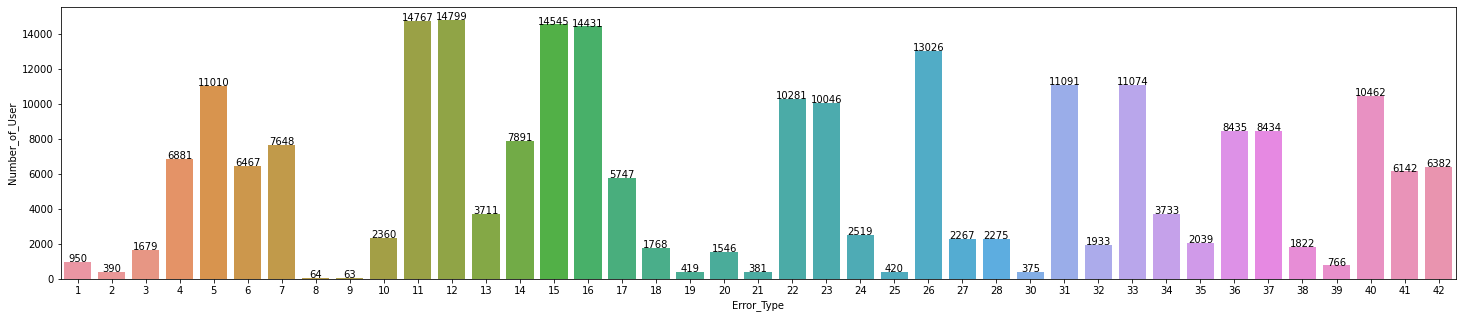

In [ ]:
fig,axes = plt.subplots(figsize=(25,5))

# 시각화 
graph=sns.barplot(x = 'Error_Type', y = 'Number_of_User', data = df)

# 수치화 
for index, row in df.iterrows():
  graph.text(row.name,row.Number_of_User, round(row.Number_of_User,2), color='black', ha="center")

In [ ]:
v=train_err[['user_id','model_nm']]
getdf = ~(v == v.shift(1))
logical =(getdf.user_id.apply(int) + getdf.model_nm.apply(int)) > 0
tre_model_counts=v[logical]

In [ ]:
user_id_2_model = tre_model_counts.user_id.value_counts()
user_id_lst_2_model=list(user_id_2_model.loc[user_id_2_model ==2].to_frame().index)
sort_two_model_user = train_err.loc[train_err.user_id.isin(user_id_lst_2_model)].drop_duplicates(['user_id','model_nm'],keep='last').drop_duplicates('user_id',keep='first').sort_values("time").user_id



Text(0, 0.5, 'users ')

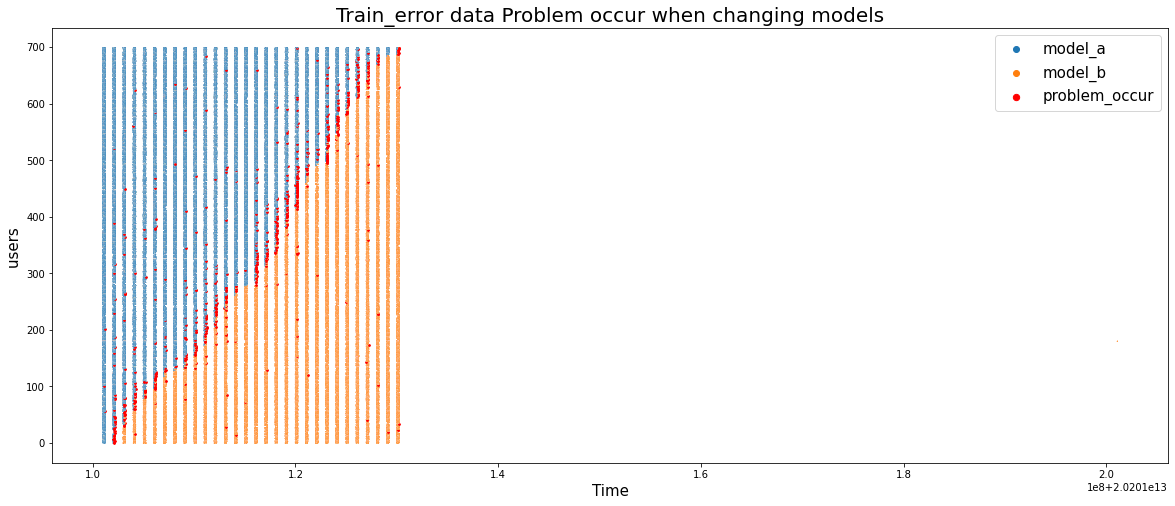

In [ ]:
plt.figure(figsize=(20,8))
for i,value in enumerate(sort_two_model_user):
    smt = train_err.loc[train_err.user_id ==value]
    p_time = train_prob.loc[train_prob.user_id ==value].time.values
    sns.scatterplot(data=smt,x='time',y=np.ones(len(smt))*i,hue='model_nm',s=1)
    plt.scatter(p_time,np.ones(len(p_time))*i,c='r',s=3,label='problem occur')
 
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
lgnd=plt.legend(list(by_label.values())[:3], ['model_a','model_b','problem_occur'],loc='upper right', prop={'size': 15})
lgnd.legendHandles[2]._sizes =[40]
plt.title("Train_error data Problem occur when changing models",fontsize=20)
plt.xlabel("Time",fontsize=15)
plt.ylabel("users ",fontsize=15)

In [ ]:
print('Shape of Train_err *Before Create* :', train_err.shape, '\n')
print('Shape of Test_err *Before Create* :', test_err.shape, '\n')
combine=[train_err]

for dataset in combine:
    dataset['year'] = [int(str(value)[: 4]) for value in dataset['time']]
    dataset['month'] = [int(str(value)[4 : 6]) for value in dataset['time']]
    dataset['day'] = [int(str(value)[6 : 8]) for value in dataset['time']]
    dataset['hour'] = [int(str(value)[8 : 10]) for value in dataset['time']]
    dataset['min'] = [int(str(value)[10 : 12]) for value in dataset['time']]
    dataset['sec'] = [int(str(value)[12 :]) for value in dataset['time']]
    
print('Shape of Train_err *After Create* :', train_err.shape, '\n')
print('Shape of Test_err *After Create* :', test_err.shape)

Shape of Train_err *Before Create* : (16554663, 6) 

Shape of Test_err *Before Create* : (16532648, 6) 

Shape of Train_err *After Create* : (16554663, 12) 

Shape of Test_err *After Create* : (16532648, 6)


In [ ]:
# Train 'month' 변수 확인
pd.DataFrame(train_err['month'].value_counts().sort_index()).style.background_gradient(cmap = 'Blues')

,month
10,5
11,16554577
12,81


In [ ]:
# Train Data Crosstab
# 모델 별 펌웨어 버전 
pd.crosstab(train_err['model_nm'], train_err['fwver']).style.background_gradient(cmap = 'Blues')

fwver,03.11.1141,03.11.1149,03.11.1167,04.16.2641,04.16.3345,04.16.3439,04.16.3553,04.16.3569,04.16.3571,04.22.1442,04.22.1656,04.22.1666,04.22.1684,04.22.1750,04.22.1778,04.33.1095,04.33.1125,04.33.1149,04.33.1171,04.33.1185,04.33.1261,04.73.2237,04.73.2571,04.82.1684,04.82.1730,04.82.1778,05.15.2090,05.15.2092,05.15.2114,05.15.2120,05.15.2122,05.15.2138,05.15.3104,05.66.3237,05.66.3571,10,8.5.3
model_nm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
model_0,0,0,0,0,0,0,0,0,0,2522,39,5,5554,2874213,1293946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
model_1,0,0,0,296,101,142,5237816,980,145156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
model_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,909,408,3272,58,963736,2504871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
model_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,18,9,706,23,1906479,191,0,0,0,0
model_4,29,2114,1505659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
model_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23554,78,8601,0,0,0,0,0,0,0,0,0,0,0
model_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1534,212
model_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31832,3524,0,0
model_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33537,2527,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## 제품별간 중복되는 펌웨어는 없음 (= 제품별 고유 펌웨이 버전 존재 )
# model0 : 03.11.1141, 	03.11.1149,	03.11.1167
# model1 : 04.16.2641	04.16.3345	04.16.3439	04.16.3553	04.16.3569	04.16.3571
# model2 : 04.33.1095	04.33.1125	04.33.1149	04.33.1171	04.33.1185	04.33.1261
# model3 : 05.15.2090	05.15.2092	05.15.2114	05.15.2120	05.15.2122	05.15.2138	05.15.3104	
# model8 : 04.73.2237	04.73.2571

In [ ]:
train_err_model=train_err[['user_id','model_nm']].drop_duplicates()
model_list=np.sort(train_err_model['model_nm'].unique())
Model = pd.DataFrame()

for i in tqdm(range(len(model_list))):
  model=np.zeros((15000))
  train_err_model1=train_err_model[train_err_model['model_nm']==model_list[i]].reset_index(drop=True)
  model[train_err_model1.user_id.unique()-10000]=1
  Model[model_list[i]]=model

100%|██████████| 9/9 [00:00<00:00, 337.07it/s]


In [ ]:
Model['Models']=Model['model_0']+Model['model_1']+Model['model_2']+Model['model_3']+Model['model_4']+Model['model_5']+Model['model_6']+Model['model_7']+Model['model_8']

In [ ]:
Multi_Model=Model[Model['Models']>=2.0]

In [ ]:
# 모델 0
Model0=Multi_Model[ (Multi_Model['model_0']==1.0 ) & ((Multi_Model['model_1']==1.0) | (Multi_Model['model_2']==1.0) | (Multi_Model['model_3']==1.0) | (Multi_Model['model_4']==1.0) | (Multi_Model['model_5']==1.0) |
                                               (Multi_Model['model_6']==1.0) | (Multi_Model['model_7']==1.0) | (Multi_Model['model_8']==1.0))].drop_duplicates(subset=['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],keep='last')

# 모델 1 
Model1=Multi_Model[ (Multi_Model['model_1']==1.0 ) &  ((Multi_Model['model_0']==1.0) | (Multi_Model['model_2']==1.0) | (Multi_Model['model_3']==1.0) | (Multi_Model['model_4']==1.0) | (Multi_Model['model_5']==1.0) |
                                               (Multi_Model['model_6']==1.0) | (Multi_Model['model_7']==1.0) | (Multi_Model['model_8']==1.0))].drop_duplicates(subset=['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],keep='last')

# 모델 2
Model2=Multi_Model[ (Multi_Model['model_2']==1.0 ) & ((Multi_Model['model_0']==1.0) | (Multi_Model['model_1']==1.0) | (Multi_Model['model_3']==1.0) | (Multi_Model['model_4']==1.0) | (Multi_Model['model_5']==1.0) |
                                               (Multi_Model['model_6']==1.0) | (Multi_Model['model_7']==1.0) | (Multi_Model['model_8']==1.0))].drop_duplicates(subset=['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],keep='last')


# 모델 3
Model3=Multi_Model[ (Multi_Model['model_3']==1.0 ) & ((Multi_Model['model_0']==1.0) | (Multi_Model['model_1']==1.0) | (Multi_Model['model_2']==1.0) | (Multi_Model['model_4']==1.0) | (Multi_Model['model_5']==1.0) |
                                               (Multi_Model['model_6']==1.0) | (Multi_Model['model_7']==1.0) | (Multi_Model['model_8']==1.0))].drop_duplicates(subset=['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],keep='last')


# 모델 4
Model4=Multi_Model[ (Multi_Model['model_4']==1.0 )  & ((Multi_Model['model_0']==1.0) | (Multi_Model['model_1']==1.0) | (Multi_Model['model_2']==1.0) | (Multi_Model['model_3']==1.0) | (Multi_Model['model_5']==1.0) |
                                               (Multi_Model['model_6']==1.0) | (Multi_Model['model_7']==1.0) | (Multi_Model['model_8']==1.0))].drop_duplicates(subset=['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],keep='last')

# 모델 5
Model5=Multi_Model[ (Multi_Model['model_5']==1.0 ) &   ((Multi_Model['model_0']==1.0) | (Multi_Model['model_1']==1.0) | (Multi_Model['model_2']==1.0) | (Multi_Model['model_3']==1.0) | (Multi_Model['model_4']==1.0) |
                                               (Multi_Model['model_6']==1.0) | (Multi_Model['model_7']==1.0) | (Multi_Model['model_8']==1.0))].drop_duplicates(subset=['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],keep='last')

# 모델 6
Model6=Multi_Model[ (Multi_Model['model_6']==1.0 ) &   ((Multi_Model['model_0']==1.0) | (Multi_Model['model_1']==1.0) | (Multi_Model['model_2']==1.0) | (Multi_Model['model_3']==1.0) | (Multi_Model['model_4']==1.0) |
                                               (Multi_Model['model_5']==1.0) | (Multi_Model['model_7']==1.0) | (Multi_Model['model_8']==1.0))].drop_duplicates(subset=['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],keep='last')

    
# 모델 7
Model7=Multi_Model[ (Multi_Model['model_7']==1.0 ) &   ((Multi_Model['model_0']==1.0) | (Multi_Model['model_1']==1.0) | (Multi_Model['model_2']==1.0) | (Multi_Model['model_3']==1.0) | (Multi_Model['model_4']==1.0) |
                                               (Multi_Model['model_5']==1.0) | (Multi_Model['model_6']==1.0) | (Multi_Model['model_8']==1.0))].drop_duplicates(subset=['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],keep='last')

    
# 모델 8
Model8=Multi_Model[ (Multi_Model['model_8']==1.0 ) &   ((Multi_Model['model_0']==1.0) | (Multi_Model['model_1']==1.0) | (Multi_Model['model_2']==1.0) | (Multi_Model['model_3']==1.0) | (Multi_Model['model_4']==1.0) |
                                               (Multi_Model['model_5']==1.0) | (Multi_Model['model_6']==1.0) | (Multi_Model['model_7']==1.0))].drop_duplicates(subset=['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],keep='last')


In [ ]:
# 모델별 다른 모델사용 

list=Model.columns
print("================"+list[0]+"================")
for i in range(len(list)-1):
    print(list[i]+'컬럼 개수: '+ str(Model0[list[i]].unique()))

print("================"+list[1]+"================")
for i in range(len(list)-1):
    print(list[i]+'컬럼 개수: '+ str(Model1[list[i]].unique()))

print("================"+list[2]+"================")
for i in range(len(list)-1):
    print(list[i]+'컬럼 개수: '+ str(Model2[list[i]].unique()))

print("================"+list[3]+"================")
for i in range(len(list)-1):
    print(list[i]+'컬럼 개수: '+ str(Model3[list[i]].unique()))

print("================"+list[4]+"================")
for i in range(len(list)-1):
    print(list[i]+'컬럼 개수: '+ str(Model4[list[i]].unique()))

print("================"+list[5]+"================")
for i in range(len(list)-1):
    print(list[i]+'컬럼 개수: '+ str(Model5[list[i]].unique()))

print("================"+list[6]+"================")
for i in range(len(list)-1):
    print(list[i]+'컬럼 개수: '+ str(Model6[list[i]].unique()))

print("================"+list[7]+"================")
for i in range(len(list)-1):
    print(list[i]+'컬럼 개수: '+ str(Model7[list[i]].unique()))


print("================"+list[8]+"================")
for i in range(len(list)-1):
    print(list[i]+'컬럼 개수: '+ str(Model8[list[i]].unique()))



================model_0================
model_0컬럼 개수: [1.]
model_1컬럼 개수: [0.]
model_2컬럼 개수: [0. 1.]
model_3컬럼 개수: [0. 1.]
model_4컬럼 개수: [0.]
model_5컬럼 개수: [0.]
model_6컬럼 개수: [1. 0.]
model_7컬럼 개수: [0.]
model_8컬럼 개수: [0.]
================model_1================
model_0컬럼 개수: [0.]
model_1컬럼 개수: [1.]
model_2컬럼 개수: [1.]
model_3컬럼 개수: [0.]
model_4컬럼 개수: [1. 0.]
model_5컬럼 개수: [0.]
model_6컬럼 개수: [0.]
model_7컬럼 개수: [0.]
model_8컬럼 개수: [0.]
================model_2================
model_0컬럼 개수: [0. 1.]
model_1컬럼 개수: [0. 1.]
model_2컬럼 개수: [1.]
model_3컬럼 개수: [0. 1.]
model_4컬럼 개수: [0. 1.]
model_5컬럼 개수: [1. 0.]
model_6컬럼 개수: [0.]
model_7컬럼 개수: [0. 1.]
model_8컬럼 개수: [0. 1.]
================model_3================
model_0컬럼 개수: [0. 1.]
model_1컬럼 개수: [0.]
model_2컬럼 개수: [0. 1.]
model_3컬럼 개수: [1.]
model_4컬럼 개수: [1. 0.]
model_5컬럼 개수: [0.]
model_6컬럼 개수: [0.]
model_7컬럼 개수: [0.]
model_8컬럼 개수: [0.]
================model_4================
model_0컬럼 개수: [0.]
model_1컬럼 개수: [0. 1.]
model_2컬럼 개수: [0. 1.]
model_3컬럼 개

In [ ]:
for name, dataset in zip(['Train'], combine):
    for month in [10, 12]:
        print('')
        day_list = np.sort(dataset[dataset['month'] == month]['day'].unique())
        print('Number of *day = {}* variable in {} :'.format(month, name), day_list)


Number of *day = 10* variable in Train : [31]

Number of *day = 12* variable in Train : [1 2]


In [ ]:
# time 변수를 datetime 타입의 변수로 만들기
def make_datetime2(x):
    
    # 슬라이싱을 위해 문자 타입으로 변경
    x = str(x)
    
    year = int(x[: 4])
    month = int(x[4 : 6])
    day = int(x[6 : 8])
    
    # datetime 타입으로 반환
    return datetime.datetime(year, month, day)

In [ ]:
train_error = [train_err]

In [ ]:
# datetime 변환 
train_err['datetime']=train_err['time'].apply(make_datetime)

In [ ]:
for dataset in train_error:
    dataset['요일'] = dataset['datetime'].apply(lambda x: x.weekday())

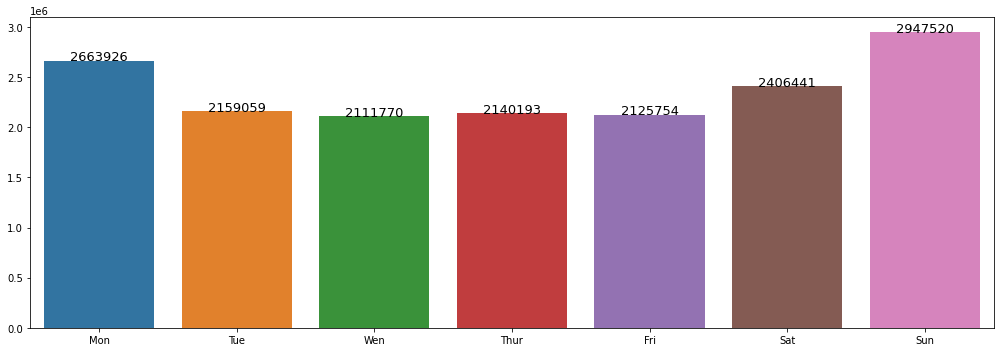

In [ ]:
# '요일' 변수 시각화
fig, ax = plt.subplots( figsize = (14, 5))
for index, datset in enumerate(train_error):
    
    # 시각화할 데이터 만들기
    plot_data = pd.DataFrame(dataset['요일'].value_counts().sort_index())
    
    # Seaborn 라이브러리의 barplot 사용
    sns.barplot(x = plot_data.index, y = '요일', data = plot_data )
    ax.set_xticklabels(['Mon', 'Tue', 'Wen', 'Thur', 'Fri', 'Sat','Sun' ])
    # axes[1].set_xticklabels(labels = ['월', '화', '수', '목', '금', '토', '일'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
     
    # 각 범주에 Count 입력
    for day, [value] in enumerate(plot_data.values):
        ax.text(day, value, value, ha = 'center', fontsize = 13)
        
fig.tight_layout()

In [ ]:
user_list=train_err.user_id.unique().tolist()

In [ ]:
df2 = pd.DataFrame(columns=['user_id', 'Number_of_Update'])

for i in tqdm(range(len(user_list))):
  count=len(train_err.loc[train_err.user_id==user_list[i]].fwver.unique())
  df2=df2.append(pd.DataFrame([[user_list[i],count]],columns=['user_id','Number_of_Update']),ignore_index=True)

100%|██████████| 15000/15000 [06:08<00:00, 40.70it/s]


In [ ]:
df3 = pd.DataFrame(columns=['user_id', 'Number_of_Update'])

for i in tqdm(range(len(user_list))):
  count=len(train_err.loc[train_err.user_id==user_list[i]].model_nm.unique())
  df3=df3.append(pd.DataFrame([[user_list[i],count]],columns=['user_id','Number_of_Update']),ignore_index=True)

100%|██████████| 15000/15000 [06:07<00:00, 40.86it/s]


In [ ]:
user=df3['Number_of_Update'].value_counts().to_frame().reset_index()
user.columns=['모델변경횟수','고객 수']
user

,모델변경횟수,고객 수
0,1,14297
1,2,702
2,3,1


In [ ]:
multi_models=df3[df3['Number_of_Update']>=2.0]

In [ ]:
multi_model_user=multi_models.user_id.tolist()

In [ ]:
#  2개 이상 사용모델 사용자 불만제기율 
multi_model_user_set = set(multi_models['user_id'])
train_proplem_user_set  = set(train_prob['user_id'])
common_errtype = multi_model_user_set.intersection(train_proplem_user_set)

print(f" 제품모델을 변경한 사용자 : {len(multi_models.user_id.unique())}"+" 명")
print(f" 제품 모델을 변경한 사용자 중 불만제기를 했던(한) 사용자 수 : {len(common_errtype)}"+" 명")
print(f" 오류발생/불만제기에 공통으로 포함되어 있는 User_id 개수    : {round(len(common_errtype)/len(multi_models.user_id.unique()),2)}"+" % ")

 제품모델을 변경한 사용자 : 703 명
 제품 모델을 변경한 사용자 중 불만제기를 했던(한) 사용자 수 : 643 명
 오류발생/불만제기에 공통으로 포함되어 있는 User_id 개수    : 0.91 % 


In [ ]:
user=train_prob.user_id.value_counts().value_counts()
user=user.to_frame().reset_index()
user.columns=['불만제기횟수','고객 수']
user

,불만제기횟수,고객 수
0,1,4625
1,2,328
2,3,41
3,4,5
4,5,1


# 품질데이터(Quality_data) EDA




In [ ]:
# datetime 전처리
train_quality['datetime']=train_quality['time'].apply(make_datetime)

In [ ]:
print(str(train_quality['datetime'].min())+' 에서 '+str(train_quality['datetime'].max()))

2020-10-31 00:00:00 에서 2020-11-30 00:00:00


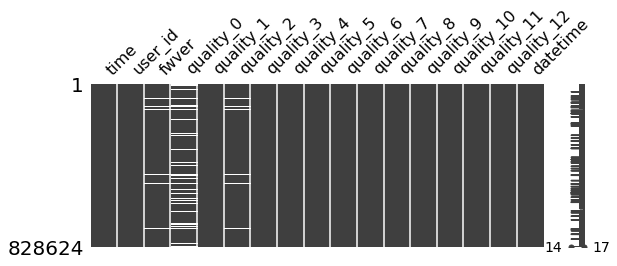

In [ ]:
missing(train_quality)

In [ ]:
# quality_0과 quality_2에서 퀄리티로그 결측치 발견 
missing_table(train_quality)

,결측치 개수
time,0
user_id,0
fwver,40080
quality_0,144432
quality_1,0
quality_2,40113
quality_3,0
quality_4,0
quality_5,20
quality_6,0


In [ ]:
# 결측치 0처리 
train_quality=train_quality.fillna(0)

In [ ]:
# quality_3  는 데이터 값이 하나밖에 없으므로 유의미 하지 않음 
list=train_quality.columns.to_list()
for i in range(len(list)):
    print(list[i]+'컬럼 개수: '+ str(len(train_quality[list[i]].unique())))

time컬럼 개수: 4319
user_id컬럼 개수: 8281
fwver컬럼 개수: 28
quality_0컬럼 개수: 753
quality_1컬럼 개수: 31
quality_2컬럼 개수: 798
quality_3컬럼 개수: 1
quality_4컬럼 개수: 1
quality_5컬럼 개수: 4745
quality_6컬럼 개수: 549
quality_7컬럼 개수: 908
quality_8컬럼 개수: 52
quality_9컬럼 개수: 539
quality_10컬럼 개수: 4200
quality_11컬럼 개수: 12
quality_12컬럼 개수: 14
datetime컬럼 개수: 31


In [ ]:
# quality_3, quality_4 컬럼 제거
train_quality=train_quality.drop(['quality_3','quality_4'],axis='columns')
test_quality=test_quality.drop(['quality_3','quality_4'],axis='columns')

In [ ]:
# 퀄리티데이터에 숫자가 있으면 발생(1) 없으면(0) 그대로 0을 반환 
# 퀄리티로그 발생 카운팅 
def quality_c(x):
    if x==0: return 0
    else: return 1

In [ ]:
list=['quality_0', 'quality_1', 'quality_2',
       'quality_5', 'quality_6', 'quality_7', 'quality_8', 'quality_9',
       'quality_10', 'quality_11', 'quality_12']

In [ ]:
for i in range(len(list)):
    train_quality[list[i]]=train_quality[list[i]].apply(quality_c)

In [ ]:
시간별카운팅=train_quality.groupby(['datetime'],as_index=False).sum()

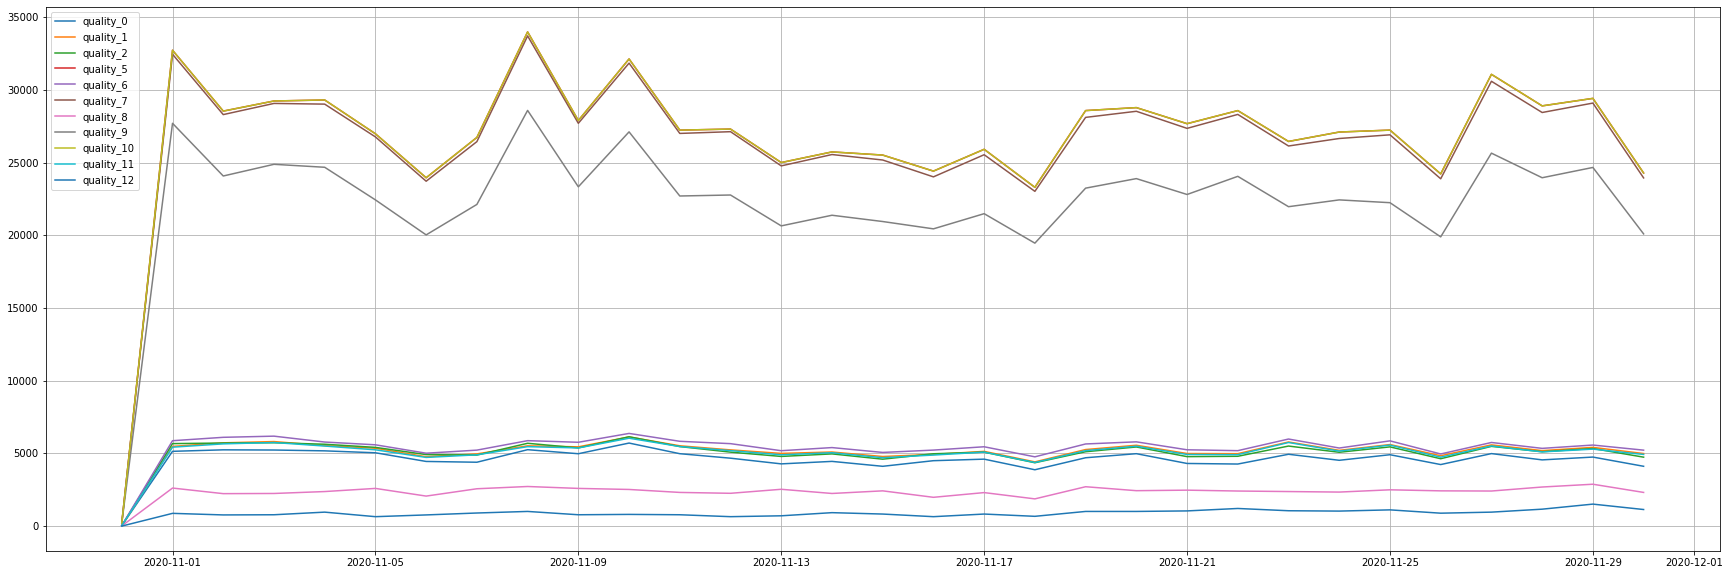

In [ ]:
# 특정 퀄리티로그와의 상관관계를 확인 
%matplotlib inline
fig=plt.figure(figsize=(30,10))
plt.rcParams['axes.grid'] = True
ax=fig.add_subplot()
for i in range(len(list)):
    ax.plot(시간별카운팅['datetime'],시간별카운팅[list[i]],label=list[i])
    ax.legend()

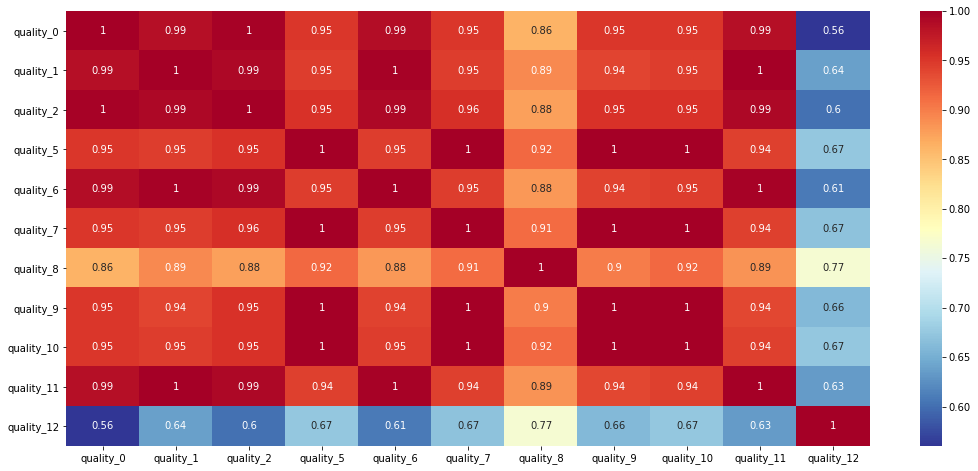

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,8))
corrmat=sns.heatmap(시간별카운팅[['quality_0','quality_1', 'quality_2',
       'quality_5', 'quality_6', 'quality_7', 'quality_8', 'quality_9',
       'quality_10', 'quality_11', 'quality_12']].corr(), annot=True, cmap='RdYlBu_r')
plt.show()

In [ ]:
fw_count=train_quality.groupby(['fwver'],as_index=False).sum()

In [ ]:
# 펌웨어값이 없는 데이터를 삭제 
idx_1=fw_count[fw_count['fwver']==0].index
fw_count=fw_count.drop(idx_1)

In [ ]:
train_quality.columns

Index(['time', 'user_id', 'fwver', 'quality_0', 'quality_1', 'quality_2',
       'quality_5', 'quality_6', 'quality_7', 'quality_8', 'quality_9',
       'quality_10', 'quality_11', 'quality_12', 'datetime'],
      dtype='object')

In [ ]:
list=['quality_0', 'quality_1', 'quality_2',
       'quality_5', 'quality_6', 'quality_7', 'quality_8', 'quality_9',
       'quality_10', 'quality_11', 'quality_12']

In [ ]:
# 필요없는 컬럼삭제
fw_count=fw_count.loc[:,['fwver','quality_0', 'quality_1', 'quality_2',
       'quality_5', 'quality_6', 'quality_7', 'quality_8', 'quality_9',
       'quality_10', 'quality_11', 'quality_12']].set_index('fwver')

In [ ]:
fw_count

,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
fwver,,,,,,,,,,,
03.11.1149,0,2,5,204,2,204,156,48,204,2,0
03.11.1167,0,14060,14632,104148,14250,101628,9720,87240,104148,15780,22584
04.16.3345,0,0,0,12,3,12,0,12,12,0,0
04.16.3439,0,1,0,12,1,12,12,12,12,0,0
04.16.3553,19361,20224,19364,111996,21201,111612,13128,93840,111996,19373,144
04.16.3571,370,387,370,2232,389,2232,252,1932,2232,370,0
04.22.1442,14,14,14,84,14,84,0,84,84,14,0
04.22.1656,0,0,0,12,2,12,0,12,12,0,0
04.22.1666,2,3,2,636,2,636,12,636,636,2,0


In [ ]:
# 데이터프레임 저장 
# 데이터프레임.to_csv(PATH+'파일이름.csv',index=True)